## Analisando o Dataframe

In [ ]:
# Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/PEDE_PASSOS_DATASET_FIAP.csv', sep = ';')
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [ ]:
df.shape

(1349, 69)

In [ ]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [ ]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

## Analisando os Dados em 2020

In [ ]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10


In [ ]:
df_2020.shape

(1349, 19)

In [ ]:
df_2020 = cleaning_dataset(df_2020)
df_2020.shape

(728, 19)

## Verficando as Instituições de Ensino em 2020


In [ ]:
df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2020,
Escola Pública,598
Rede Decisão/União,101
FIAP,11
UNISA,10
Estácio,3
Einstein,2
Escola João Paulo II,2
V202,1


In [ ]:
#renomeando os valores da coluna instituição de ensino 2020
df_2020["INSTITUICAO_ENSINO_ALUNO_2020"] = df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].replace({
    'FIAP' : 'Universidade',
    'UNISA' : 'Universidade',
    'Estácio' : 'Universidade',
    'Einstein' : 'Outros',
    'Escola João Paulo II' : 'Outros',
    'V202' : 'Outros',
})

#verificando as alterações
print(df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].unique())

['Escola Pública' 'Rede Decisão/União' 'Outros' 'Universidade']


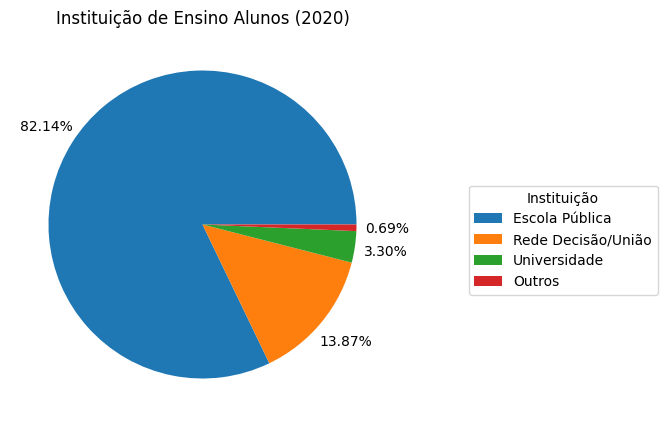

In [ ]:
#Verficando as Instituições de ensino dos alunos em 2020
fig, ax = plt.subplots(figsize=(12,5))

ax.pie(df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].value_counts(), autopct="%.2f%%", pctdistance=1.2)

ax.legend(labels= df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].value_counts().index, title="Instituição", loc="lower right", bbox_to_anchor=(1.7, 0.3))

ax.set_title("Instituição de Ensino Alunos (2020)")

plt.show()

## Idade dos Alunos no Ano de 2020

In [ ]:
#encontrando a linha da "idade" D108
d108 = df_2020.index[df_2020["IDADE_ALUNO_2020"] == "D108"].tolist()

if d108:
    print(f"O valor está na linha: {d108}")
else:
    print("Não Encontrado")

O valor está na linha: [1258]


In [ ]:
linha = df_2020.index[df_2020["IDADE_ALUNO_2020"] == "D108"].tolist()
df_2020.loc[linha]

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
1258,Outros,ALUNO-1259,D108,D971,D207,D9600,D980,D9891/2,D9891/2A,D301,D302,NaN,D910,V920,D930,D940,D950,D960,D970


In [ ]:
linha_2 = df_2020.index[df_2020["PONTO_VIRADA_2020"] == "D9600"].tolist()
df_2020.loc[linha_2]

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
1258,Outros,ALUNO-1259,D108,D971,D207,D9600,D980,D9891/2,D9891/2A,D301,D302,NaN,D910,V920,D930,D940,D950,D960,D970


In [ ]:
df_2020.drop(linha, inplace=True)


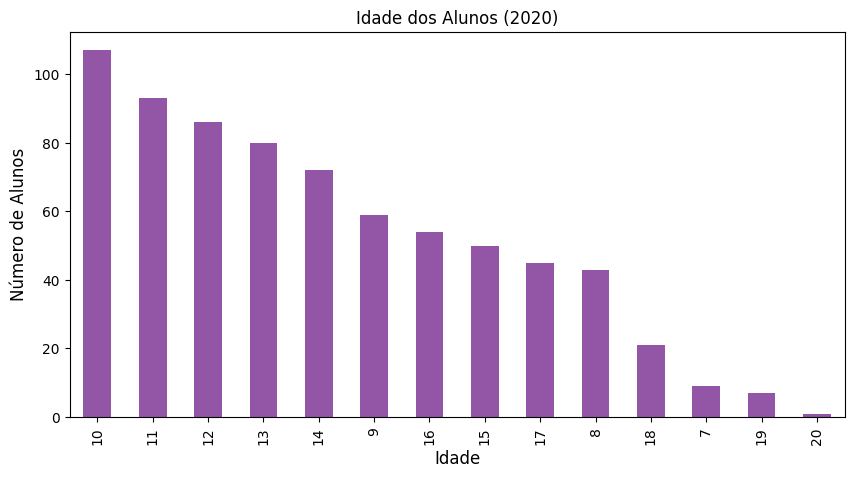

In [ ]:
#Idade dos Alunos na Passos

count_idade = df_2020["IDADE_ALUNO_2020"].value_counts()
axis = count_idade.plot(kind="bar", figsize=(10,5), color = "#9355a6")

plt.title("Idade dos Alunos (2020)")
plt.xlabel("Idade", size = 12)
plt.ylabel("Número de Alunos", size = 12)
plt.show()



## Verificando Nível de Defasagem dos Alunos em 2020




In [ ]:
# Convertendo os valores das colunas para strings
df_2020['IAN_2020'] = df_2020['IAN_2020'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2020['IAN_2020'] = df_2020['IAN_2020'].replace({
    '10': 'Nível Ideal',
    '2.5': 'Nível Crítico',
    '5': 'Nível Moderado',
    '5.0': 'Nível Moderado',
    '10.0': 'Nível Ideal'
})

# Verificando as alterações
print(df_2020['IAN_2020'].unique())

['Nível Ideal' 'Nível Moderado' 'Nível Crítico']


In [ ]:
df_2020["IAN_2020"].unique()

array(['Nível Ideal', 'Nível Moderado', 'Nível Crítico'], dtype=object)

In [ ]:
df_2020["IAN_2020"].isnull().sum()

0

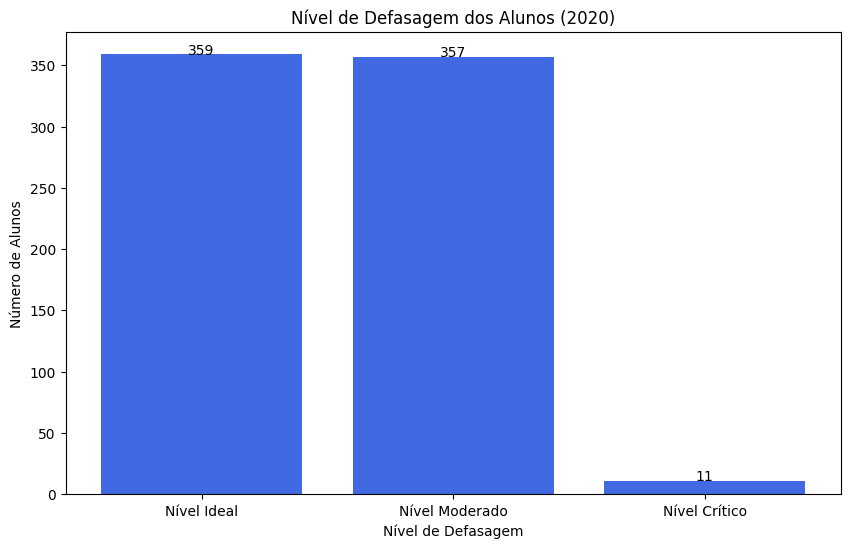

In [ ]:
def plot_exact_counter(size, x, y, df) -> None:

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values, color = 'royalblue')
  plt.title('Nível de Defasagem dos Alunos (2020)', fontsize = 12)
  plt.xlabel('Nível de Defasagem')
  plt.ylabel('Número de Alunos')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

plot_exact_counter(size= (10, 6), x='IAN_2020', y=df_2020['IAN_2020'].value_counts(), df=df_2020)
df_ian_2020 = df_2020.groupby('IAN_2020')['FASE_TURMA_2020'].count().reset_index().set_index('IAN_2020')

## Ponto de Virada em 2020

Nota para determinação do IPV em 2020: 8,63 (PEDE, 2020)



In [ ]:
df_2020["IPV_2020"].unique()

array(['7.75', '8.111113333333334', '8.166665', '8.94445', '6.8333325',
       '10.00001', '5.277770000000001', '7.916665', '7.25',
       '7.944446666666665', '9.944453333333334', '6.916665',
       '6.277773333333332', '7.944443333333334', '8.29167',
       '8.222226666666668', '7.77778', '6.777780000000001', '8.04167',
       '7.583335', '7.416665', '8.22222', '0', '8.666667499999999',
       '7.5833325', '6.444439999999998', '8.124995', '7.333333333333333',
       '7.5', '8', '7.749995', '9.75001', '6.58333', '7.666665',
       '7.444443333333333', '9.11112', '7.333335', '9.166676666666666',
       '6.999995', '6.66666', '5.7083325', '8.722226666666666', '9.58334',
       '7.5000025', '7.58333', '6.791665', '8.791664999999998',
       '7.833333333333333', '7.66667', '7.8750025', '7.611103333333333',
       '5.111106666666666', '3.500005', '6.95833', '5.444446666666667',
       '5.499996666666667', '8.8333375', '7.277776666666666', '8.333335',
       '8.611113333333334', '8.6250075'

In [ ]:
df_2020["IPV_2020"] = df_2020["IPV_2020"].astype(float)

In [ ]:
def atingiu_IPV_20(df_2020):
   if df_2020["IPV_2020"] >= 8.63:
    return 'Sim'
   else:
    return 'Não'

In [ ]:
df_2020["ATINGIU_IPV_20"] = df_2020.apply(atingiu_IPV_20, axis=1)
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,ATINGIU_IPV_20
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.750000,Nível Ideal,Não
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113,Nível Ideal,Não
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.750000,Nível Moderado,Não
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,Nível Ideal,Não
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.944450,Nível Ideal,Sim


In [ ]:
count_IPV_2020 = df_2020["ATINGIU_IPV_20"].value_counts()
count_IPV_2020

,count
ATINGIU_IPV_20,
Não,633
Sim,94


In [ ]:
#Calculando a porcentagem dos alunos que atingiram o PV

porcentagem_2020= []

for i in range(count_IPV_2020.shape[0]):
  porcentagem_2020.append(round(count_IPV_2020[i] / count_IPV_2020.sum() * 100, 2))
  print(f"{count_IPV_2020.index[i]}: {porcentagem_2020[i]}%")

Não: 87.07%
Sim: 12.93%


<ipython-input-27-e8b91de9c044>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentagem_2020.append(round(count_IPV_2020[i] / count_IPV_2020.sum() * 100, 2))


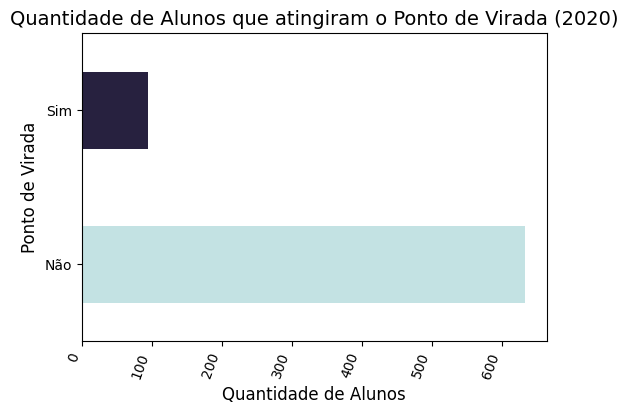

In [ ]:
cores = sns.color_palette("ch:start=.2,rot=-.3", n_colors=2)

count_IPV_2020.plot(kind='barh', color=cores, figsize=(6,4))
plt.title("Quantidade de Alunos que atingiram o Ponto de Virada (2020)", size= 14)
plt.xlabel("Quantidade de Alunos",size=12)
plt.ylabel("Ponto de Virada", size=12)

plt.xticks(rotation=70, ha="right")

plt.show()

# Analisando os Dados em 2021

In [ ]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,...,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,...,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,...,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,...,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,...,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


In [ ]:
df_2021.shape

(686, 21)

In [ ]:
df_2021.isnull().sum()

,0
NOME,0
FASE_2021,0
TURMA_2021,0
INSTITUICAO_ENSINO_ALUNO_2021,0
SINALIZADOR_INGRESSANTE_2021,0
PEDRA_2021,0
INDE_2021,0
IAA_2021,0
IEG_2021,0
IPS_2021,0


In [ ]:
df_2021['IPV_2021'].unique()

array([ 8.1,  7.2,  7.4,  8.5,  9.7,  6. ,  8.8,  5.2,  8.3,  9.9,  7.9,
        8.7,  9.4,  6.7,  7.8,  8. ,  8.4,  5.8,  8.6,  9.2,  7. ,  7.7,
        5.1,  6.2, 10. ,  6.1,  0. ,  5.6,  9.1,  2.5,  5.9,  4.1,  7.5,
        3.8,  6.8,  3.7,  8.2,  6.9,  6.6,  7.6,  7.3,  4.3,  9.8,  9. ,
        6.3,  9.3,  4.4,  5.7,  9.6,  3.5,  4.7,  8.9,  4.8,  3.9,  2.6,
        5.5,  6.4,  9.5,  5.3,  4.6,  6.5,  4.2,  5.4,  7.1,  4.9,  4.5,
        3.3,  4. ,  3.6,  3.4,  5. ,  2.9,  2.8])

In [ ]:
#encontrando a linha com informação "#NULO!"
NULO = df_2021.index[df_2021["PEDRA_2021"] == "#NULO!"].tolist()

if NULO:
    print(f"O valor está na linha: {NULO}")
else:
    print("Não Encontrado")

O valor está na linha: [70, 505]


In [ ]:
linha_3 = df_2021.index[df_2021["PEDRA_2021"] == "#NULO!"].tolist()
df_2021.loc[linha_3]

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
70,ALUNO-71,0.0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,...,0.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,5.0,Nível 2 (5o e 6o ano),-2.0
505,ALUNO-506,0.0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,...,0.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,10.0,ALFA (2o e 3o ano),0.0


In [ ]:
df_2021.replace({'PEDRA_2021': ['#NULO!', 'NA']}, 0,inplace=True)

In [ ]:
linha_4 = df_2021.index[df_2021["PEDRA_2021"] == 0].tolist()
df_2021.loc[linha_4]

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,IAN_2020,ATINGIU_IPV_21
70,ALUNO-71,0.0,J,Escola Pública,Veterano,0,#NULO!,7.4,0.0,5.0,...,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,Nível Moderado,Nível 2 (5o e 6o ano),-2.0,Nível Moderado,Não
505,ALUNO-506,0.0,J,Escola Pública,Veterano,0,#NULO!,7.4,0.0,5.0,...,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,Nível Ideal,ALFA (2o e 3o ano),0.0,Nível Ideal,Não


In [ ]:
# Convertendo os valores das colunas para strings
df_2021['IAN_2021'] = df_2021['IAN_2021'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2021['IAN_2020'] = df_2021['IAN_2021'].replace({
    '10': 'Nível Ideal',
    '2.5': 'Nível Crítico',
    '5': 'Nível Moderado',
    '5.0': 'Nível Moderado',
    '10.0': 'Nível Ideal'
})

# Verificando as alterações
print(df_2021['IAN_2020'].unique())

['Nível Moderado' 'Nível Ideal' 'Nível Crítico']


In [ ]:
df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2021,
Escola Pública,557
Rede Decisão,127
Escola JP II,2


In [ ]:
#renomeando os valores da coluna instituição de ensino 2021
df_2021["INSTITUICAO_ENSINO_ALUNO_2021"] = df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].replace('Escola JP II', 'Outros')

#verificando as alterações
print(df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].unique())

['Rede Decisão' 'Escola Pública' 'Outros']


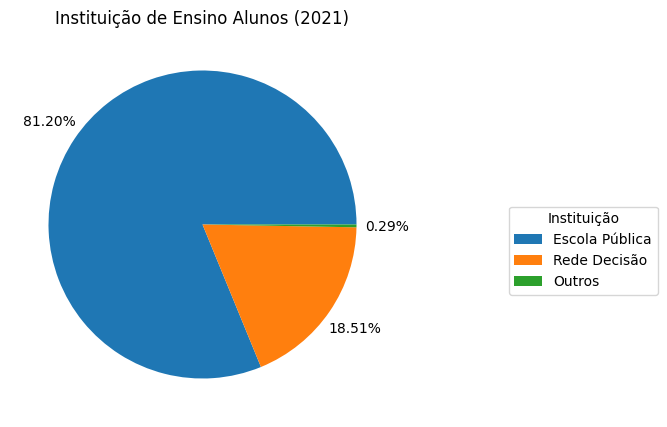

In [ ]:
#Verficando as Instituições de ensino dos alunos em 2021
fig, ax = plt.subplots(figsize=(12,5))

ax.pie(df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].value_counts(), autopct="%.2f%%", pctdistance=1.2)

ax.legend(labels= df_2021["INSTITUICAO_ENSINO_ALUNO_2021"].value_counts().index, title="Instituição", loc="lower right", bbox_to_anchor=(1.7, 0.3))

ax.set_title("Instituição de Ensino Alunos (2021)")

plt.show()

## Verificando o Nível de Defasagem em 2021

In [ ]:
# Convertendo os valores das colunas para strings
df_2021['IAN_2021'] = df_2021['IAN_2021'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2021['IAN_2021'] = df_2021['IAN_2021'].replace({
    '10': 'Nível Ideal',
    '2.5': 'Nível Crítico',
    '5': 'Nível Moderado',
    '5.0': 'Nível Moderado',
    '10.0': 'Nível Ideal'
})

# Verificando as alterações
print(df_2021['IAN_2021'].unique())

['Nível Moderado' 'Nível Ideal' 'Nível Crítico']


In [ ]:
# Convertendo os valores das colunas para strings
df_2021['FASE_2021'] = df_2021['FASE_2021'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2021['FASE_2021'] = df_2021['FASE_2021'].replace({
    '1.0': 'Fase 1',
    '2.0': 'Fase 2',
    '3.0': 'Fase 3',
    '4.0': 'Fase 4',
    '5.0': 'Fase 5',
    '6.0': 'Fase 6',
    '7.0': 'Fase 7',
    '8.0': 'Fase 8',
})

# Verificando as alterações
print(df_2021['FASE_2021'].unique())

['Fase 2' 'Fase 3' 'Fase 5' 'Fase 1' '0.0' 'Fase 4' 'Fase 7' 'Fase 6']


In [ ]:
df_2021["IAN_2021"].unique()

array(['Nível Moderado', 'Nível Ideal', 'Nível Crítico'], dtype=object)

In [ ]:
df_2021["IAN_2021"].isnull().sum()

0

In [ ]:
df_2021["FASE_2021"].unique()

array(['Fase 2', 'Fase 3', 'Fase 5', 'Fase 1', '0.0', 'Fase 4', 'Fase 7',
       'Fase 6'], dtype=object)

In [ ]:
#df_ian_2021 = df.groupby('IAN_2021')['FASE_2021'].count()
#df_ian_2022 = df.groupby('IAN_2022')['FASE_2022'].count()


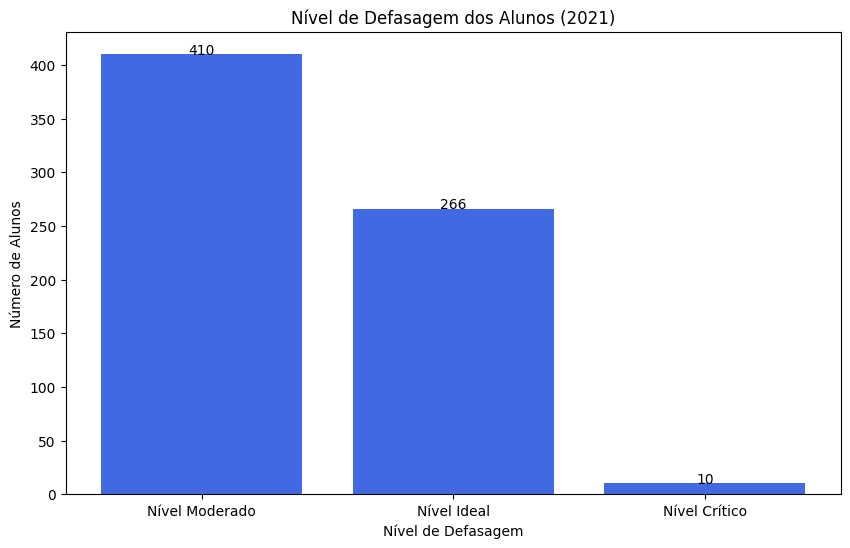

In [ ]:
def plot_exact_counter(size, x, y, df) -> None:

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values, color = 'royalblue')
  plt.title('Nível de Defasagem dos Alunos (2021)', fontsize = 12)
  plt.xlabel('Nível de Defasagem')
  plt.ylabel('Número de Alunos')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

plot_exact_counter(size= (10, 6), x='FASE_2021', y=df_2021['IAN_2021'].value_counts(), df=df_2021)
df_ian_2021 = df_2021.groupby('IAN_2021')['FASE_2021'].count().reset_index().set_index('IAN_2021')

# Ponto de Virada em 2021

Nota para determinação do IPV em 2021: 9,02*  (PEDE, 2021)

 *A nota do IPV, no ano de 2021, não consta no PEDE (2021). Então, o cálculo do IPV foi realizado, conforme o PEDE (2020), somando a média do IPV de todos os alunos com o desvio padrão.




In [ ]:
df_2021["IPV_2021"].describe()

,IPV_2021
count,686.00000
mean,7.40758
std,1.62708
min,0.00000
25%,6.60000
50%,7.70000
75%,8.60000
max,10.00000


In [ ]:
df_2021["IPV_2021"].dtype

dtype('float64')

In [ ]:
def atingiu_IPV_21(df_2021):
   if df_2021["IPV_2021"] >= 9.02:
    return 'Sim'
   else:
    return 'Não'

In [ ]:
df_2021['ATINGIU_IPV_21'] = df_2021.apply(atingiu_IPV_21, axis=1)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,IAN_2020,ATINGIU_IPV_21
0,ALUNO-1,Fase 2,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,...,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,Nível Moderado,Nível 3 (7o e 8o ano),-1.0,Nível Moderado,Não
2,ALUNO-3,Fase 3,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,...,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,Nível Ideal,Nível 3 (7o e 8o ano),0.0,Nível Ideal,Não
4,ALUNO-5,Fase 2,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,...,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,Nível Ideal,Nível 2 (5o e 6o ano),0.0,Nível Ideal,Não
7,ALUNO-8,Fase 5,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,...,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,Nível Ideal,Nível 5 (1o EM),0.0,Nível Ideal,Não
10,ALUNO-11,Fase 1,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,...,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,Nível Ideal,Nível 1 (4o ano),0.0,Nível Ideal,Sim


In [ ]:
count_IPV_2021 = df_2021["ATINGIU_IPV_21"].value_counts()
count_IPV_2021

,count
ATINGIU_IPV_21,
Não,589
Sim,97


In [ ]:
#Calculando a porcentagem dos alunos que atingiram o PV

porcentagem_2021= []

for i in range(count_IPV_2021.shape[0]):
  porcentagem_2021.append(round(count_IPV_2021[i] / count_IPV_2021.sum() * 100, 2))
  print(f"{count_IPV_2021.index[i]}: {porcentagem_2021[i]}%")

Não: 85.86%
Sim: 14.14%


<ipython-input-53-35df4dcb2f86>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentagem_2021.append(round(count_IPV_2021[i] / count_IPV_2021.sum() * 100, 2))


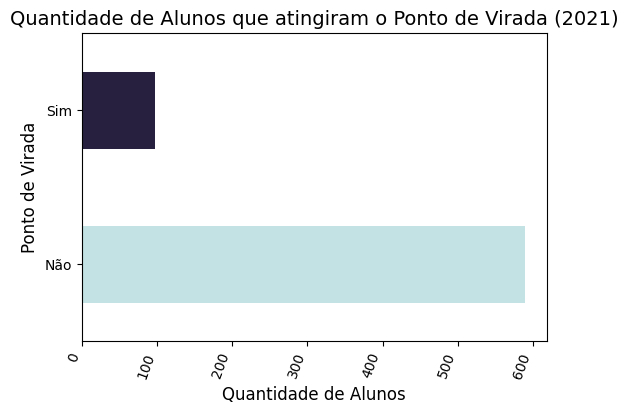

In [ ]:
cores = sns.color_palette("ch:start=.2,rot=-.3", n_colors=2)

count_IPV_2021.plot(kind='barh', color=cores, figsize=(6,4))
plt.title("Quantidade de Alunos que atingiram o Ponto de Virada (2021)", size= 14)
plt.xlabel("Quantidade de Alunos",size=12)
plt.ylabel("Ponto de Virada", size=12)

plt.xticks(rotation=70, ha="right")

plt.show()

## Analisando os Dados em 2022

## Verificando o Nível de Defasagem dos Alunos em 2022

In [ ]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,ALUNO-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,ALUNO-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [ ]:
df_2022.shape

(1349, 31)

In [ ]:
df_2022 = cleaning_dataset(df_2022)
df_2022.shape

(862, 31)

In [ ]:
# Convertendo os valores das colunas para strings
df_2022['IAN_2022'] = df_2022['IAN_2022'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2022['IAN_2022'] = df_2022['IAN_2022'].replace({
    '10': 'Nível Ideal',
    '2.5': 'Nível Crítico',
    '5': 'Nível Moderado',
    '5.0': 'Nível Moderado',
    '10.0': 'Nível Ideal'
})

# Verificando as alterações
print(df_2022['IAN_2022'].unique())

['Nível Moderado' 'Nível Ideal' 'Nível Crítico']


In [ ]:
# Convertendo os valores das colunas para strings
df_2022['FASE_2022'] = df_2022['FASE_2022'].astype(str)

# Renomeando os valores do Indicador de Adequação de Nível
df_2022['FASE_2022'] = df_2022['FASE_2022'].replace({
    '1.0': 'Fase 1',
    '2.0': 'Fase 2',
    '3.0': 'Fase 3',
    '4.0': 'Fase 4',
    '5.0': 'Fase 5',
    '6.0': 'Fase 6',
    '7.0': 'Fase 7',
    '8.0': 'Fase 8',
})

# Verificando as alterações

In [ ]:
df_2022["IAN_2022"].unique()

array(['Nível Moderado', 'Nível Ideal', 'Nível Crítico'], dtype=object)

In [ ]:
df_2022["IAN_2022"].isnull().sum()

0

In [ ]:
df_2022["FASE_2022"].unique()

array(['0.0', 'Fase 2', 'Fase 1', 'Fase 5', 'Fase 4', 'Fase 3', 'Fase 7',
       'Fase 6'], dtype=object)

In [ ]:
#df_ian_2021.plot.barh(figsize=(6,4), color = 'royalblue')

#plt.ylabel('Nível de Defasagem', fontsize = 10)
#plt.xlabel('Número de Alunos', fontsize = 10)
#plt.title('Nível de Defasagem dos Alunos (2021)', fontsize = 12)

#plt.show()

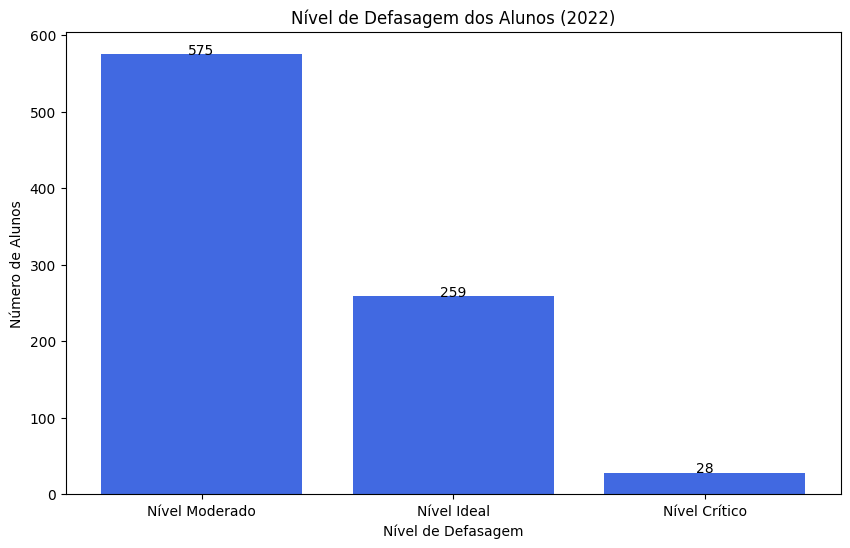

In [ ]:
def plot_exact_counter(size, x, y, df) -> None:

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values, color = 'royalblue')
  plt.title('Nível de Defasagem dos Alunos (2022)', fontsize = 12)
  plt.xlabel('Nível de Defasagem')
  plt.ylabel('Número de Alunos')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

plot_exact_counter(size= (10, 6), x='FASE_2022', y=df_2022['IAN_2022'].value_counts(), df=df_2022)
df_ian_2022 = df_2022.groupby('IAN_2022')['FASE_2022'].count().reset_index().set_index('IAN_2022')

## Ponto de Virada em 2022


Nota para determinação do IPV em 2022: 8,4  (PEDE, 2022)



In [ ]:
df_2022["IPV_2022"].dtype

dtype('float64')

In [ ]:
def atingiu_IPV_22(df_2022):
   if df_2022["IPV_2022"] >= 8.4:
    return 'Sim'
   else:
    return 'Não'

In [ ]:
df_2022['ATINGIU_IPV_22'] = df_2022.apply(atingiu_IPV_22, axis=1)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,...,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,ATINGIU_IPV_22
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,Nível Moderado,Fase 2 (5º e 6º ano),Não
3,ALUNO-4,Fase 2,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,Nível Moderado,Fase 3 (7º e 8º ano),Não
4,ALUNO-5,Fase 2,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,Nível Moderado,Fase 3 (7º e 8º ano),Não
5,ALUNO-6,Fase 2,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,...,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,Nível Ideal,Fase 2 (5º e 6º ano),Não
6,ALUNO-7,Fase 1,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,...,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,Nível Moderado,Fase 2 (5º e 6º ano),Não


In [ ]:
count_IPV_2022 = df_2022["ATINGIU_IPV_22"].value_counts()
count_IPV_2022

,count
ATINGIU_IPV_22,
Não,756
Sim,106


In [ ]:
#Calculando a porcentagem dos alunos que atingiram o PV

porcentagem_2022= []

for i in range(count_IPV_2022.shape[0]):
  porcentagem_2022.append(round(count_IPV_2022[i] / count_IPV_2022.sum() * 100, 2))
  print(f"{count_IPV_2022.index[i]}: {porcentagem_2022[i]}%")

Não: 87.7%
Sim: 12.3%


<ipython-input-69-3bc9927866ff>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentagem_2022.append(round(count_IPV_2022[i] / count_IPV_2022.sum() * 100, 2))


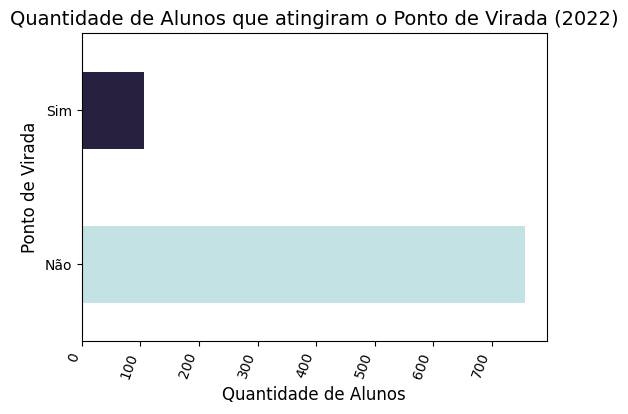

In [ ]:
cores = sns.color_palette("ch:start=.2,rot=-.3", n_colors=2)

count_IPV_2022.plot(kind='barh', color=cores, figsize=(6,4))
plt.title("Quantidade de Alunos que atingiram o Ponto de Virada (2022)", size= 14)
plt.xlabel("Quantidade de Alunos",size=12)
plt.ylabel("Ponto de Virada", size=12)

plt.xticks(rotation=70, ha="right")

plt.show()

## Comparando o Indicador Ponto de Virada nos Anos de 2020, 2021 e 2022

In [ ]:
porcentagem_2020_series = pd.Series(porcentagem_2020)
porcentagem_2021_series = pd.Series(porcentagem_2021)
porcentagem_2022_series = pd.Series(porcentagem_2022)

#concatenando as colunas
df_concat = pd.concat([porcentagem_2020_series, porcentagem_2021_series, porcentagem_2022_series], axis=1)
df_concat

,0,1,2
0,87.07,85.86,87.7
1,12.93,14.14,12.3


In [ ]:
# Renomeando os indices
df_concat.index = ['Não', 'Sim']

# Renomeaando as colunas
df_concat.columns = ['2020', '2021', '2022']

print(df_concat)

      2020   2021  2022
Não  87.07  85.86  87.7
Sim  12.93  14.14  12.3


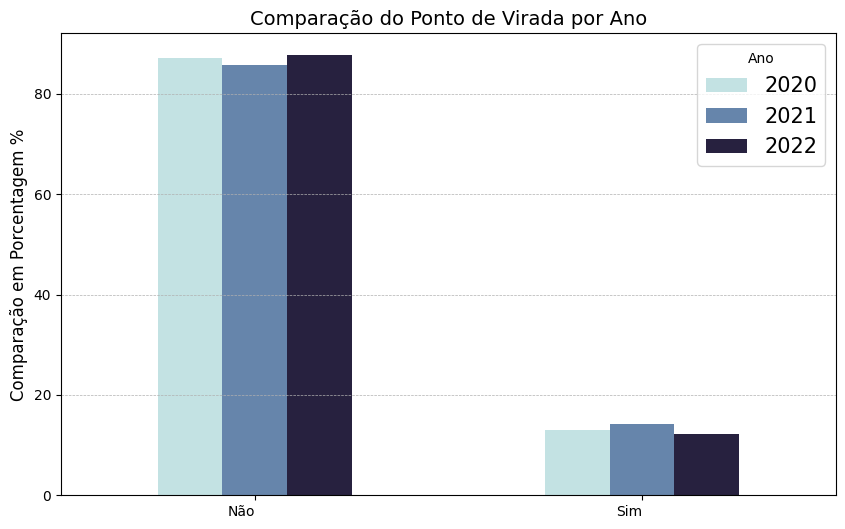

In [ ]:
cores = sns.color_palette("ch:start=.2,rot=-.3", n_colors=3)

df_concat.plot(kind='bar',figsize=(10,6), color=cores)
plt.title("Comparação do Ponto de Virada por Ano", size= 14)
plt.ylabel("Comparação em Porcentagem %", size=12)
plt.legend(title="Ano", loc="upper right",fontsize=15)
plt.xticks(rotation=360, ha="right")
plt.grid(which='both', axis='y', linestyle='--', linewidth=0.5)

plt.show()